Here is a test of another parameterization, a simple piecewise function.

In [1]:
# Routine

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline
%load_ext snakeviz

import numpy as np
from scipy.optimize import minimize
from scipy.optimize import rosen, differential_evolution
from scipy.special import expit
import matplotlib.pyplot as plt
import scipy

from matplotlib.lines import Line2D

import timeit

import pandas as pd

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [2]:
# For test use. This is some random structure.

array12 = np.asarray(np.split(np.random.rand(1,60)[0],12))

In [3]:
# Here is the activation function
# Using sigmoid

def act(x):
    x = np.asarray(x, dtype=float)
    # np.piecewise complexity
    if not x.shape:
        x = np.asarray([x])
        
    return np.piecewise(x, [x<=-1.0, (x>-1.0)&(x<1.0), x>=1.0], [0.0, lambda x: x+1.0, 2.0])

def actp(x):
    x = np.asarray(x, dtype=float)
    # np.piecewise complexity
    if not x.shape:
        x = np.asarray([x])
    return np.piecewise(x, [x<=-1.0,(x>-1.0)&(x<1.0), x>=1.0], [0.0, 1.0, 0.0])

Here comes the density matrix

In [4]:
# Density matrix in the forms that I wrote down on my Neutrino Physics notebook
# x is a real array of 12 arrays.

init = np.array([1.0,0.0,0.0,0.0])

def rho(x,ti,initialCondition):
    
    elem = np.ones(4)
    
    for i in np.linspace(0,3,4):
        elem[i] = np.sum(ti*x[i*3]*act(ti*x[i*3+1] + x[i*3+2]) )
    
    return init + elem
    

In [5]:
xtest = np.linspace(-5, 5, 10)
#np.piecewise(xtest, [xtest < 0,  0 <= xtest , xtest< 10], [lambda x: -x, 0,lambda x: x])
#[act(i) for i in xtest]
print act(xtest), actp(xtest),act(np.linspace(-5, 5, 10))

[ 0.          0.          0.          0.          0.44444444  1.55555556
  2.          2.          2.          2.        ] [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.] [ 0.          0.          0.          0.          0.44444444  1.55555556
  2.          2.          2.          2.        ]


In [6]:
# Hamiltonian of the problem, in terms of four real components

hamil = np.array( [  np.cos(2.0),np.sin(2.0) ] )
print hamil

[-0.41614684  0.90929743]


In [7]:
def rhop(x,ti,initialCondition):
    
    rhoprime = np.zeros(4)
    
    for i in np.linspace(0,3,4):
        rhoprime[i] = np.sum(x[i*3] * (act(ti*x[i*3+1] + x[i*3+2]) ) ) +  np.sum( ti*x[i*3]* (actp(ti*x[i*3+1] + x[i*3+2]) ) * x[i*3+1]  )
        
    return rhoprime

def costi(x,ti,initialCondition):
    
    rhoi = rho(x,ti,initialCondition)
    rhopi = rhop(x,ti,initialCondition)
    
    costTemp = np.zeros(4)
    
    costTemp[0] = ( rhopi[0] - 2.0*rhoi[3]*hamil[1] )**2
    costTemp[1] = ( rhopi[1] + 2.0*rhoi[3]*hamil[1] )**2
    costTemp[2] = ( rhopi[2] - 2.0*rhoi[3]*hamil[0] )**2
    costTemp[3] = ( rhopi[3] + 2.0*rhoi[2]*hamil[0] - hamil[1] * (rhoi[1] - rhoi[0] ) )**2
    
    return np.sum(costTemp)# + 2.0*(rhoi[0]+rhoi[1]-1.0)**2


In [8]:
costi(array12,0,init)

75.248234503210085

In [9]:
def cost(x,t,initialCondition):
    
    costTotal = map(lambda t: costi(x,t,initialCondition),t)
    
    return 0.5*np.sum(costTotal)

In [10]:
cost(array12,np.array([0,1,2]),init)

942.33067356593722

## Opt

In [179]:
# with ramdom initial guess. TO make it more viable, I used (-5,5)

initGuess = np.asarray(np.split(10.0*(np.random.rand(1,60)[0] - 0.5),12))
#initGuess = np.split(np.zeros(60),12)
endpoint = 2
tlin = np.linspace(0,endpoint,11)

def costF(x):
    return cost(x,tlin,init)

start = timeit.default_timer()
costvFResult = minimize(costF,initGuess,method="SLSQP",tol=1e-20,options={"maxiter":100000})
stop = timeit.default_timer()

print stop - start

print costvFResult

332.467500925
  status: 0
 success: True
    njev: 266
    nfev: 17463
     fun: 3.9935523388899563
       x: array([-0.15152841, -1.94018797,  5.92542494, -2.89342189, -1.53209121,
       -5.63196575,  0.12838157, -1.61662166,  4.23324327, -0.23587051,
       -2.10747071,  1.        , -0.43416793,  2.82902564,  2.14387215,
        1.86004434,  0.9300407 ,  3.71844183, -3.71708932,  4.16424037,
       -3.9741398 , -3.6146737 , -1.42148769, -1.64558062, -3.1677958 ,
        1.11783045, -4.42998133,  4.01115353,  4.30314453, -2.03824114,
       -2.48991282, -3.46795841, -1.10689359,  3.55358919,  1.49956898,
        2.80779233, -2.90737638,  4.43337326, -0.20067331, -0.7771892 ,
       -2.61019175, -4.75058246, -4.43381669, -4.76131835, -4.35752187,
       -2.21982539, -0.25504872,  0.62040069, -0.71958607, -4.71746457,
        3.93162228,  4.7636722 ,  4.60871033, -3.92711824, -0.75314393,
       -1.85104407, -1.44778093, -4.28190828, -4.79229298, -3.31821476])
 message: 'Optimization t

In [180]:
xresult = costvFResult.x

[ 1.          0.99387764  0.98775528  0.98163292  0.97551056  0.9693882
  0.96326584  0.95714348  0.95102112  0.94489876  0.9387764   0.93265404
  0.92653168  0.92040932  0.91428696  0.9081646   0.90204224  0.89591988
  0.88979752  0.88367516  0.8775528   0.87143044  0.86530808  0.85918572
  0.85306336  0.846941    0.84081864  0.83469628  0.82857392  0.82245156
  0.81632921  0.81020685  0.80408449  0.79796213  0.79183977  0.78571741
  0.77959505  0.77347269  0.76735033  0.76122797  0.75510561  0.74898325
  0.74286089  0.73673853  0.73061617  0.72449381  0.71837145  0.71224909
  0.70612673  0.70000437  0.69388201  0.68775965  0.68163729  0.67551493
  0.66939257  0.66327021  0.65714785  0.65102549  0.64490313  0.63878077
  0.63265841  0.62653605  0.62041369  0.61429133  0.60816897  0.60204661
  0.59592425  0.58980189  0.58367953  0.57755717  0.57143481  0.56531245
  0.55919009  0.55306773  0.54694537  0.54082301  0.53470065  0.52857829
  0.52245593  0.51633357  0.51021121  0.50408885  0.

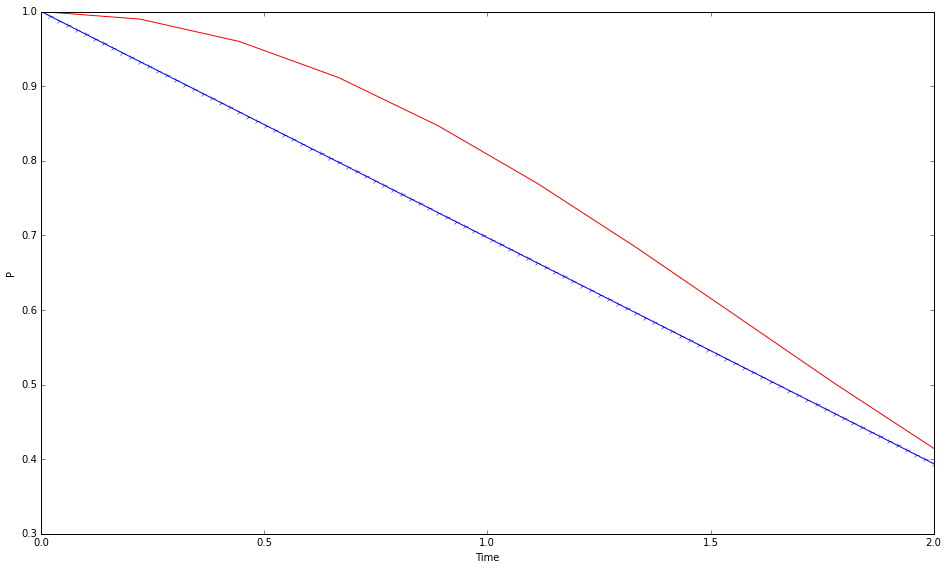

In [181]:
plttlin=np.linspace(0,endpoint,100)
pltdata11 = np.array([])
for i in plttlin:
    pltdata11 = np.append(pltdata11 ,rho(xresult,i,init)[0] )
    
print pltdata11

plt.figure(figsize=(16,9.36))
plt.ylabel('P')
plt.xlabel('Time')
plt.plot(np.linspace(0,2,10),1-(np.sin(2.0)**2)*(np.sin(0.5*np.linspace(0,2,10)) )**2,"r-")
plt.plot(plttlin,pltdata11,"b4-",label="vac_rho11")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="MMA-rho11-Vac-80-60")

In [15]:
# with ramdom initial guess
# %snakeviz

devoendpoint = 2
devotlin = np.linspace(0,devoendpoint,11)

devocostF = lambda x: cost(x,devotlin,init)

bounds=np.zeros([60,2])
for i in range(60):
    bounds[i,0]=-1.0
    bounds[i,1]=1.0
#print bounds

startdevo = timeit.default_timer()
devo = differential_evolution(devocostF,bounds,strategy='best1bin',tol=1e-10,maxiter=1000,polish=True)
stopdevo = timeit.default_timer()

print stopdevo - startdevo

print devo


 
*** Profile stats marshalled to file u'/var/folders/mj/1sl30v6x2g5_lnlgdnngtd3c0000gn/T/tmpMM2Lgf'. 
8772.16894317
    nfev: 902181
 success: False
     fun: 0.41530344736255909
       x: array([-0.19157547,  0.98144124, -0.17788479,  0.19167042,  0.99484129,
       -0.19390707,  0.08128669,  0.9397772 ,  0.05982029, -0.71112814,
       -0.42622836, -0.08886587,  0.84155385,  0.13463446, -0.20875486,
        0.33975804,  0.31812753,  0.48543283, -0.13301137, -0.65916465,
       -0.36715875, -0.96746614, -0.59805125, -0.43224079,  0.70468589,
       -0.06033605,  0.2447094 ,  0.91535706,  0.05227244,  0.1485852 ,
       -0.261282  , -0.49103958, -0.00467097,  0.54691629,  0.50047263,
       -0.70237623,  0.71067802,  0.04146898,  0.75011293, -0.53135988,
       -0.70811674,  0.36197354, -0.67477106, -0.89865131, -0.48742844,
        0.09042956,  0.12695701,  0.45077686,  0.24835921, -0.1434204 ,
        0.23928394,  0.55230244, -0.34856422, -0.09506867,  0.52915013,
       -0.46917022

[ 1.          0.99674151  0.99332954  0.98976411  0.9860452   0.98217282
  0.97814698  0.97396766  0.96963488  0.96514862  0.9605089   0.9557157
  0.95076904  0.9456689   0.94041529  0.93500822  0.92944767  0.92373365
  0.91786617  0.91184521  0.90567078  0.89934289  0.89286152  0.88622668
  0.87943838  0.8724966   0.86540135  0.85815263  0.85075044  0.84319479
  0.83548566  0.82762306  0.81960699  0.81143745  0.80311445  0.79463797
  0.78600802  0.7772246   0.76828771  0.75919735  0.74995352  0.74055622
  0.73100546  0.72130122  0.71144351  0.70143233  0.69126768  0.68094956
  0.67047797  0.65985291  0.64907438  0.63814238  0.62705691  0.61581797
  0.60442556  0.59287968  0.58118033  0.5693275   0.55732121  0.54516145
  0.53557462  0.5278342   0.52009378  0.51235335  0.50461293  0.49687251
  0.48913208  0.48139166  0.47365124  0.46591081  0.45817039  0.45042997
  0.44268955  0.43494912  0.4272087   0.41946828  0.41172785  0.40398743
  0.39624701  0.38850659  0.38076616  0.37302574  0.

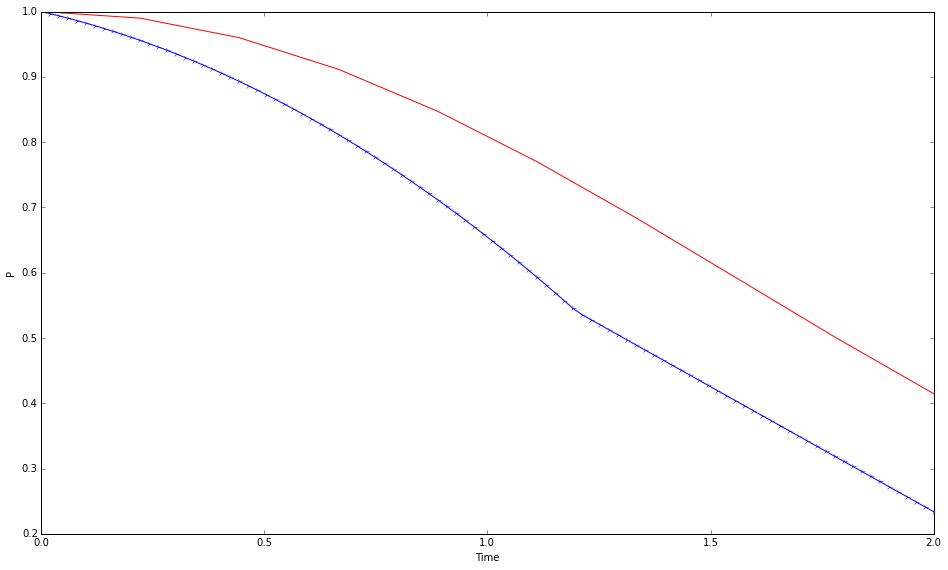

In [16]:
devoxresult = devo.x

devoplttlin=np.linspace(0,devoendpoint,100)
devopltdata11 = np.array([])
for i in devoplttlin:
    devopltdata11 = np.append(devopltdata11 ,rho(devoxresult,i,init)[0] )
    
print devopltdata11

plt.figure(figsize=(16,9.36))
plt.ylabel('P')
plt.xlabel('Time')
plt.plot(np.linspace(0,2,10),1-(np.sin(2.0)**2)*(np.sin(0.5*np.linspace(0,2,10)) )**2,"r-")
plt.plot(devoplttlin,devopltdata11,"b4-",label="vac_rho11")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="MMA-rho11-Vac-80-60")